# CVE Data Stories: CWE Trends - Data Analysis

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Preparing the Top 10 CWE Dataset (1999–2024)

This dataset focuses on the **Top 10 CWEs** based on cumulative counts up to 2024, providing a clear view of the most prevalent vulnerabilities over time. The preparation process includes:

- **Data Filtering**:
  - Excluded `NVD-CWE-noinfo` and `NVD-CWE-Other` for cleaner analysis.
  - Focused on data between **1999 and 2024**, explicitly excluding 2025.
- **Top 10 CWEs Selection**: Identified CWEs with the highest cumulative counts in 2024.
- **Streamlined Dataset**: Retained only relevant entries for the Top 10 CWEs across the years.

This refined dataset is saved for further analysis, enabling impactful visualizations and insights into long-term CWE trends.


In [41]:
# Load the dataset
data = pd.read_csv("../../../data/cve_data_stories/cwe_trends/processed/cwe_yearly_cumulative.csv")

# Filter out `NVD-CWE-noinfo` and `NVD-CWE-Other` CWEs
data = data[~data["CWE_ID"].str.startswith("NVD-CWE")]

# Filter years after 1999 and before 2025
data = data[(data["Year"] >= 1999) & (data["Year"] < 2025)]

# Filter for the top 10 CWEs by cumulative count in 2024
top_cwes_2024 = data[data["Year"] == 2024].sort_values("Cumulative_Count", ascending=False).head(10)
top_cwes_ids = top_cwes_2024["CWE_ID"].tolist()

# Filter dataset for only the top 10 CWEs and exclude 2025 explicitly
filtered_data = data[(data["CWE_ID"].isin(top_cwes_ids)) & (data["Year"] < 2025)].copy()

# Save the final dataset
filtered_data.to_csv("../../../data/cve_data_stories/cwe_trends/processed/top_10_cwe_yearly_cumulative.csv",
                     index=False)

## Top 10 CWE Rank Trends (1999–2024)

This plot visualizes the **Top 10 CWEs** by rank over time, highlighting their evolution from 1999 to 2024. Each CWE’s line is color-coded, with key features to enhance clarity and impact:

- **End Markers & Labels**: Final ranks in 2024 are highlighted with markers and labeled directly for easy interpretation.
- **Inverted Y-Axis**: Rank 1 is at the top, emphasizing higher frequency.
- **Highlighted Years**: Dashed vertical lines mark notable years (2007, 2017, 2018, 2022, 2024).
- **Readable Design**: A vibrant color palette, clear gridlines, and padding ensure visual appeal and clarity for sharing.

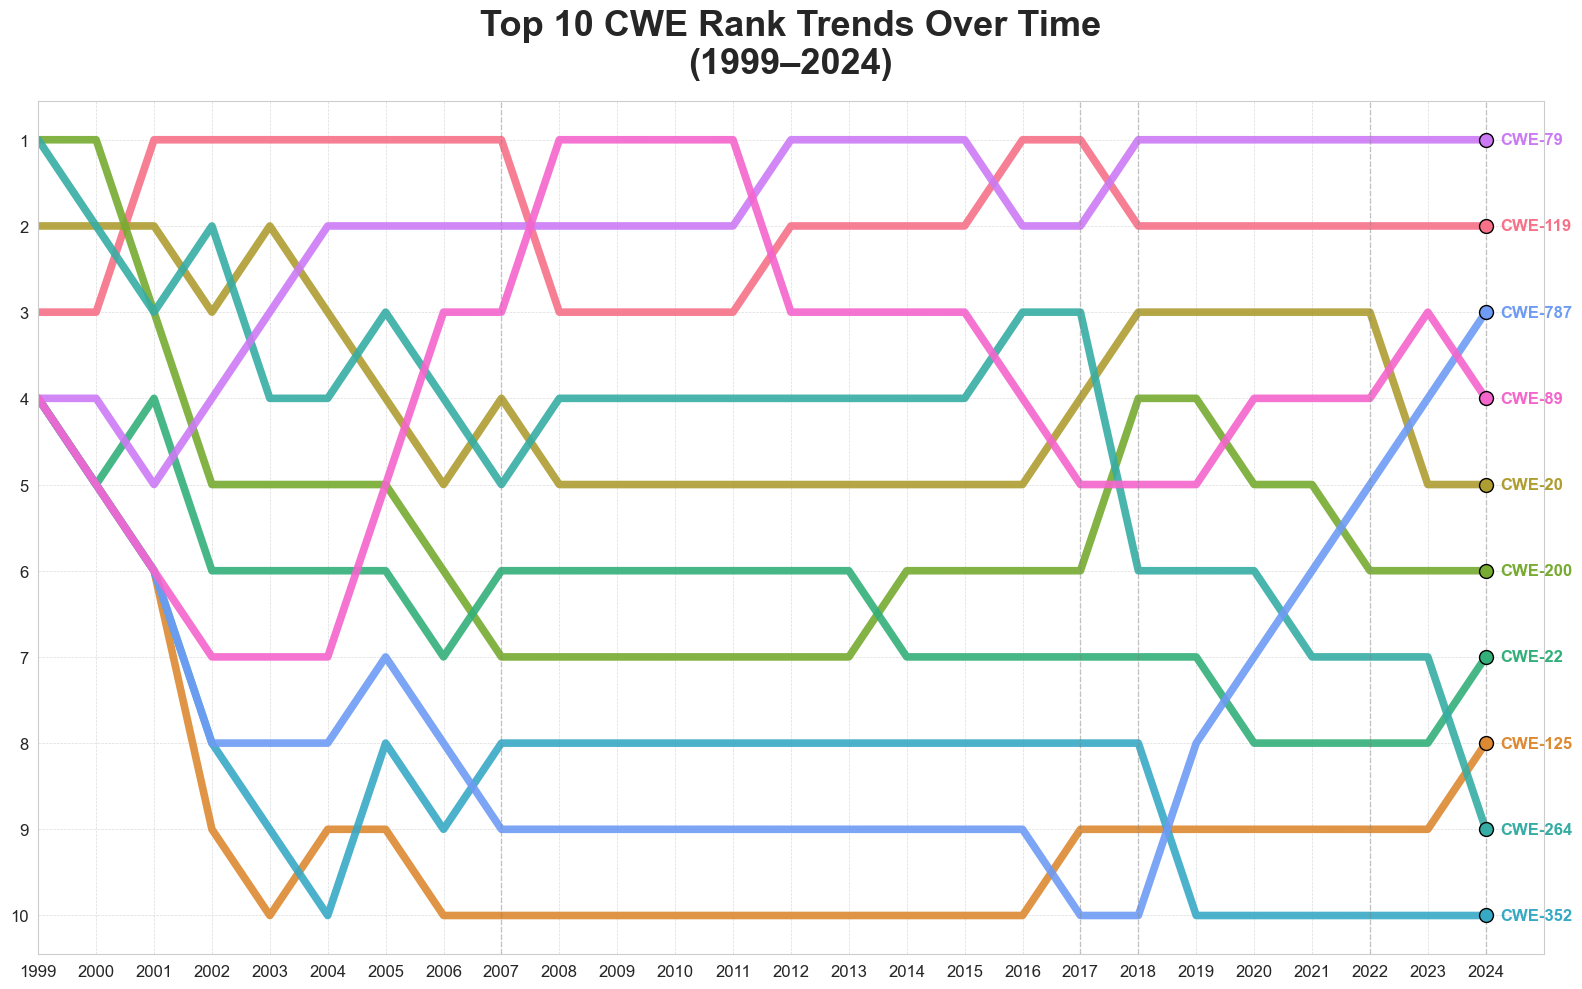

In [42]:
# Step 1: Calculate ranks for each year
filtered_data["Rank"] = (
    filtered_data.groupby("Year")["Cumulative_Count"]
    .rank(method="dense", ascending=False)
    .astype(int)
)

# Sort CWEs by their final rank (2024)
final_ranks = (
    filtered_data[filtered_data["Year"] == 2024]
    .sort_values("Rank")[["CWE_ID", "Rank"]]
    .set_index("CWE_ID")
)
filtered_data["Final_Rank"] = filtered_data["CWE_ID"].map(final_ranks["Rank"])

# Step 2: Sort data by final rank
filtered_data = filtered_data.sort_values(["Final_Rank", "Year"])

# Step 3: Plotting the rank trends
plt.figure(figsize=(16, 10))  # Larger figure size for better readability
sns.set_style("whitegrid")

# Use a vibrant color palette
palette = sns.color_palette("husl", len(filtered_data["CWE_ID"].unique()))

# Plot each CWE line with markers
for i, (cwe_id, cwe_data) in enumerate(filtered_data.groupby("CWE_ID")):
    plt.plot(
        cwe_data["Year"],
        cwe_data["Rank"],
        color=palette[i],
        label=cwe_id,
        linewidth=5.5,
        alpha=0.9,
    )
    # Add markers at the end of each line
    plt.scatter(
        cwe_data["Year"].iloc[-1],  # Last year
        cwe_data["Rank"].iloc[-1],  # Last rank
        color=palette[i],
        edgecolor="black",
        s=100,  # Marker size
        zorder=5,
    )
    # Add right-side labels with additional spacing
    plt.text(
        cwe_data["Year"].iloc[-1] + 0.25,  # Offset for label spacing
        cwe_data["Rank"].iloc[-1],
        cwe_id,
        fontsize=12,
        weight="bold",
        color=palette[i],
        verticalalignment="center",
    )

# Invert y-axis to show rank 1 at top
plt.gca().invert_yaxis()

# TITLES: Main title + optional subtitle for clarity
plt.title("Top 10 CWE Rank Trends Over Time\n(1999–2024)", fontsize=26, weight="bold", pad=20)

# Axis labels and ticks
plt.xticks(ticks=range(1999, 2025), fontsize=12)
plt.yticks(range(1, 11), fontsize=12)  # showing ranks 1 to 10

# Adjust x-axis limits to provide padding for dots and labels
plt.xlim(1999, 2025)

# Remove legend since lines are labeled directly on the right
plt.legend([], [], frameon=False)

# Gridlines
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)

# Highlight specific years with vertical lines
highlight_years = [2007, 2017, 2018, 2022, 2024]
for year in highlight_years:
    plt.axvline(x=year, color="gray", linestyle="--", linewidth=1, alpha=0.4)

plt.tight_layout()
plt.savefig("../../../data/cve_data_stories/cwe_trends/processed/top_25_cwe_rank_trends.png", dpi=300,
            bbox_inches="tight")
plt.show()